In [50]:
import numpy as np
import pandas as pd
%matplotlib inline 


In [51]:

from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV,Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [90]:
pd.set_option('display.max_columns', None) # displays all pd columns

In [52]:
housing = pd.read_csv('~/Documents/NYCDSA/Projects/P3. ML Ames/Ames_HousePrice.csv')
housing.shape

(2580, 82)

In [91]:
housing.head(10)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
5,6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
6,7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,2fmCon,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,N,SBrkr,936,0,0,0.0,0.0,1,0,2,1,TA,4,Min2,0,NaN,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
7,8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2007.0,Fin,2.0,428.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
8,9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,1984,1984,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,647.0,Unf,0.0,217.0,864.0,GasA,TA,Y,SBrkr,889,0,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1984.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,0,0,NaN,N

In [54]:
housing.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

# EDA

Text(0, 0.5, 'Count')

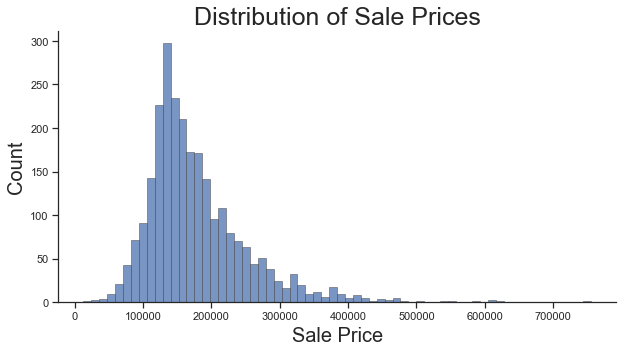

In [55]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(
    housing,
    x="SalePrice",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

ax.set_title("Distribution of Sale Prices", size="25")
ax.set_xlabel("Sale Price", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

Text(0, 0.5, 'Count')

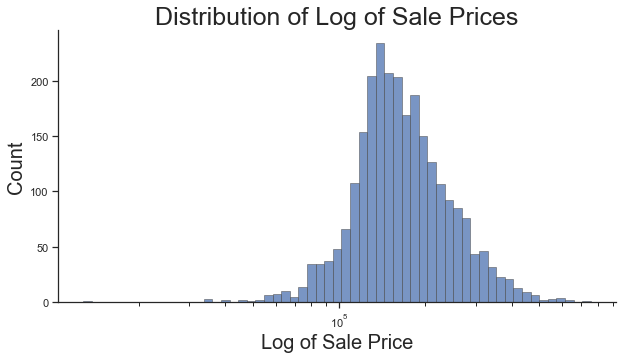

In [76]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(
    housing,
    x="SalePrice",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

ax.set_title("Distribution of Log of Sale Prices", size="25")
ax.set_xlabel("Log of Sale Price", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

In [82]:
grouped_house_prices = housing.groupby(["Neighborhood"])["SalePrice"].median().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'NoRidge'),
  Text(1, 0, 'NridgHt'),
  Text(2, 0, 'GrnHill'),
  Text(3, 0, 'StoneBr'),
  Text(4, 0, 'Veenker'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'Timber'),
  Text(7, 0, 'ClearCr'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Crawfor'),
  Text(10, 0, 'Greens'),
  Text(11, 0, 'Blmngtn'),
  Text(12, 0, 'NWAmes'),
  Text(13, 0, 'SawyerW'),
  Text(14, 0, 'Gilbert'),
  Text(15, 0, 'Mitchel'),
  Text(16, 0, 'NPkVill'),
  Text(17, 0, 'NAmes'),
  Text(18, 0, 'Landmrk'),
  Text(19, 0, 'SWISU'),
  Text(20, 0, 'Sawyer'),
  Text(21, 0, 'Blueste'),
  Text(22, 0, 'BrkSide'),
  Text(23, 0, 'Edwards'),
  Text(24, 0, 'OldTown'),
  Text(25, 0, 'IDOTRR'),
  Text(26, 0, 'BrDale'),
  Text(27, 0, 'MeadowV')])

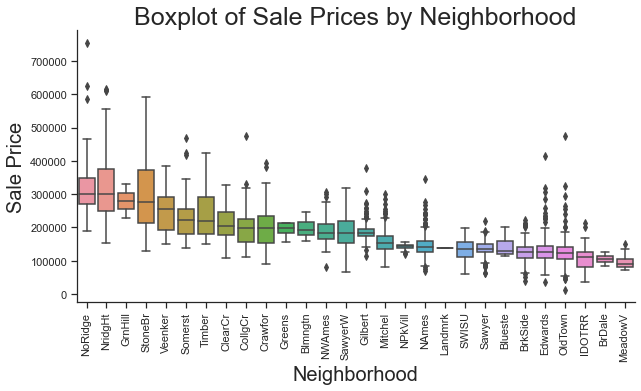

In [83]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.boxplot(
    data=housing,
    x="Neighborhood",
    y="SalePrice",
    order=grouped_house_prices.index
)

ax.set_title("Boxplot of Sale Prices by Neighborhood", size="25")
ax.set_xlabel("Neighborhood", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
plt.xticks(rotation=90)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

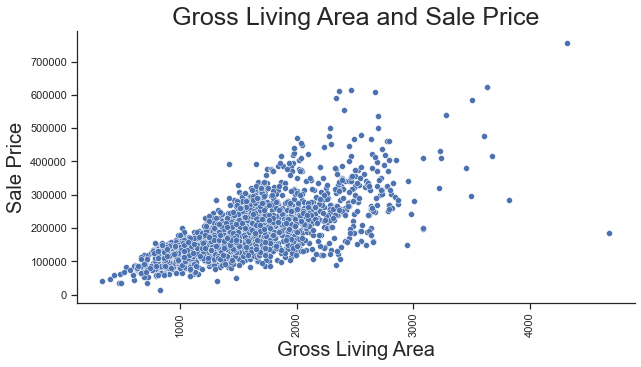

In [87]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.scatterplot(
    data=housing,
    x="GrLivArea",
    y="SalePrice",
    palette="deep"
)

ax.set_title("Gross Living Area and Sale Price", size="25")
ax.set_xlabel("Gross Living Area", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)

plt.xticks(rotation=90)

(array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

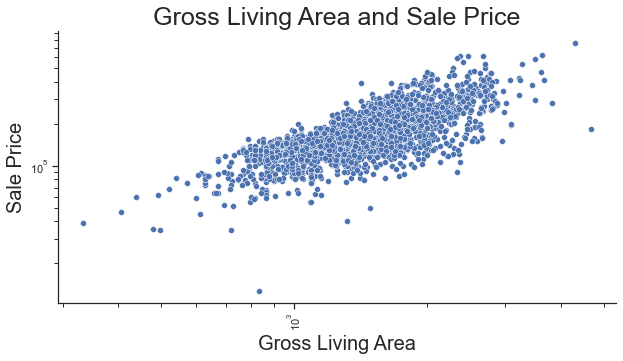

In [89]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.scatterplot(
    data=housing,
    x="GrLivArea",
    y="SalePrice",
    palette="light:m_r"
)

ax.set_title("Gross Living Area and Sale Price", size="25")
ax.set_xlabel("Gross Living Area", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
ax.set(xscale="log", yscale="log")
plt.xticks(rotation=90)

In [ ]:
sns.catplot(x="size", y="total_bill", data=tips)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

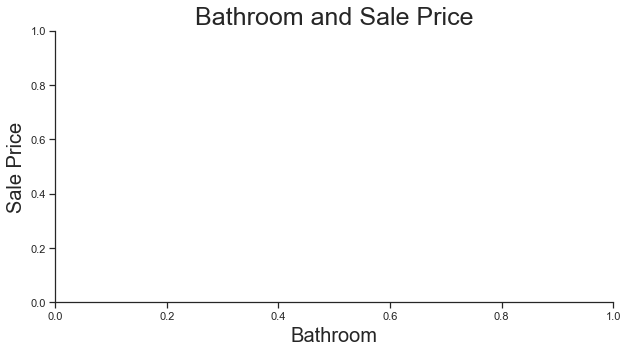

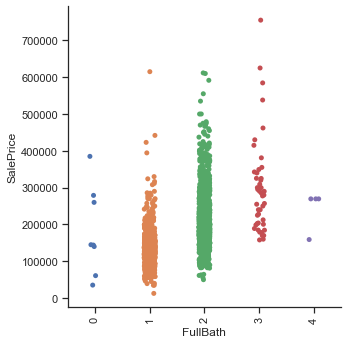

In [101]:
#sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.catplot(
    data=housing,
    x="FullBath",
    y="SalePrice"
)

ax.set_title("Bathroom and Sale Price", size="25")
ax.set_xlabel("Bathroom", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)

plt.xticks(rotation=90)